In [1]:
import numpy as np 
import matplotlib.pylab as plt 
from scipy.optimize import minimize

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

In [2]:
xmin = 0.0
xmax = np.pi
npoint = 1000

x = np.linspace(xmin, xmax, npoint)
f1 = -x**2 + 4*x

c = 0.1

f2 = -x**2 + (4 + 2*c) * x -4*c - c**2

### Sinusoidal Model

In [3]:
def log_likelihood(theta, x, y):
    a, omega, phi = theta
    model = a * np.sin(omega*x + phi)
    return -0.5 * np.sum((y - model) ** 2)

In [4]:
nll = lambda *args: -log_likelihood(*args)
initial = np.array([4.0, 1.0, 0.0]) 

In [5]:
soln = minimize(nll, initial, args=(x, f1))

In [6]:
for i in range(3):
    print('Parameter value is {:.2f}'.format(soln.x[i]))

Parameter value is 4.05
Parameter value is 0.76
Parameter value is 0.05


In [7]:
# f3 = soln.x[0] * np.sin(soln.x[1]*x + soln.x[2])
f3 = 4.0 * np.sin(0.75*x + 0.05)

### Plot

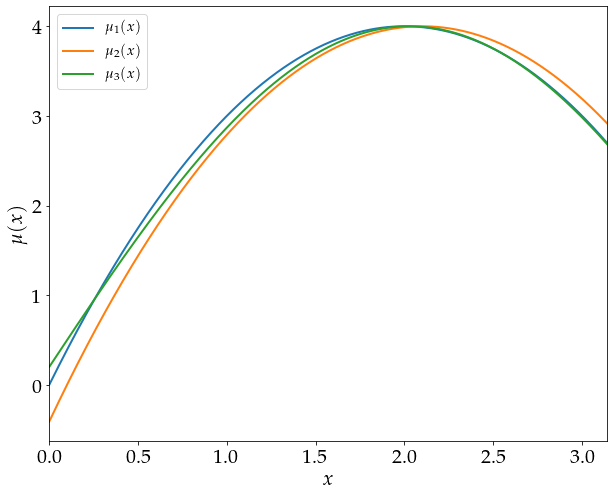

In [10]:
plt.figure(figsize = (10, 8))
plt.plot(x, f1, lw = 2, label = r'$\mu_{1}(x)$')
plt.plot(x, f2, lw = 2, label = r'$\mu_{2}(x)$')
plt.plot(x, f3, lw = 2, label = r'$\mu_{3}(x)$')
plt.xlim(xmin, xmax)
plt.ylabel(r'$\mu(x)$', fontsize = fontSize)
plt.xlabel(r'$x$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.savefig('/Users/Harry/Desktop/models.pdf', bbox_inches = 'tight')
plt.show()